In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Path space

A path in $\mathbb R$ given by $n$ points
$$\{(t_i, x_i): i = 0, \ldots, n\}$$
is a linear interpolation $X:(-\infty, \infty) \mapsto \mathbb R$ with time-values 
$$X(t) = x_i \cdot \frac{t_{i+1} - t}{t_{i+1} - t_i} 
+ x_{i+1} \cdot \frac{t - t_{i}}{t_{i+1} - t_i}, \ \forall t\in [t_i, t_{i+1})$$
or otherwise
$$X(t) = x_n I(t \ge t_n) + x_0 I(t<t_0).$$

In [5]:
'''=============
a path with state in $n$ dim space
Input:
    dim: positive integer
    time_step: np 1-d array
================'''
class Path_1d:
    def __init__(self,
                time_step=np.linspace(0,1,11)
                ):
        self.time_step = time_step
        self.state = np.zeros(len(time_step))
        

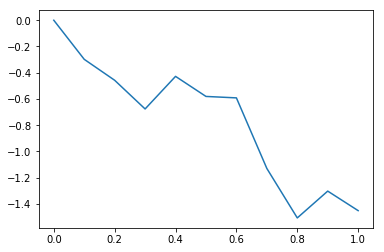

In [8]:
'''============
Test path class by BM
=============='''
T =1
num_time_step = 10
time_step = np.linspace(0, T, num_time_step+1)
dw = np.zeros(num_time_step+1)
dw[1:] = np.random.normal(0, 1, size=(1,num_time_step))*np.sqrt(T/num_time_step)
w = dw.cumsum()
path_1 = Path_1d(time_step=time_step)
path_1.state = w
plt.plot(path_1.time_step, path_1.state)

In [10]:
'''============
arethmetic average for the state values 
designed for arithmetric asian option
=============='''
def arithmetic_average(self):
    return self.state.mean()       
Path_1d.arithmetic_average = arithmetic_average

In [11]:
#test
path_1.arithmetic_average()

-0.765677626928838

In [34]:
'''===========
projection
============='''
def projection(self, time_proj):
    subpath = Path_1d(time_proj)
    i = 0
    for j in range(len(time_proj)):
        while self.time_step[i] <= time_proj[j] and i<len(self.time_step):
            i = i+1
        if i>=len(self.time_step):
            subpath.state[j] = self.state[-1]
        elif i==0:
            subpath.state[j] = self.state[0]
        else:
            lam = (self.time_step[i] - time_proj[j])/(self.time_step[i] - self.time_step[i-1])
            subpath.state[j] = lam*self.state[i-1]+(1-lam)*self.state[i]
    return subpath

Path_1d.projection = projection

In [35]:
path_1.state

array([ 0.        , -0.29789578, -0.45760803, -0.67622293, -0.42782152,
       -0.58076066, -0.59177634, -1.12982984, -1.5067827 , -1.30243147,
       -1.45132461])

In [36]:
subpath_1 = path_1.projection(np.linspace(0,1,6))

IndexError: index 11 is out of bounds for axis 0 with size 11

In [ ]:
path1.geometric_average(no_initial=0)